In [40]:
import torch
import torchvision
from torchvision import transforms, datasets

In [41]:
train=datasets.MNIST("",train=True, download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))

test=datasets.MNIST("",train=False, download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))

In [42]:
trainset = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=32, shuffle=True)

In [43]:
import torch.nn as nn
import torch.nn.functional as F

In [44]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)        
        return F.log_softmax(x, dim=1)
    
    

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [62]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=1e-3)

EPOCHS = 3

net.train()
for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net.forward(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(f"epoch {epoch}: loss {loss}")

epoch 0: loss 0.19936063885688782
epoch 1: loss 0.024901431053876877
epoch 2: loss 0.01784035935997963


In [61]:
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testset:
        X, y = data
        output = net.forward(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+=1
            total+=1
    
print(f"Testing accuracy: {correct/total:.2f}%")

Testing accuracy: 0.96%


In [57]:
import matplotlib.pyplot as plt

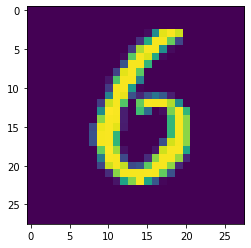

tensor(6)


In [58]:
n=5
plt.imshow(X[n].view(28,28))
plt.show()

print(torch.argmax(net.forward(X[n].view(-1,784))[0]))